# Capstone: Supervised Learning

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about **explanatory versus predictive power** and experiment with both.

Please execute the three tasks above in a Jupyter notebook that you will submit to the grading team below.

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

* A specified research question your model addresses
* How you chose your model specification and what alternatives you compared it to
* The practical uses of your model for an audience of interest
* Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

# Breast Cancer Wisconsin (Diagnostic) Data Set
Context information listed below from: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

    1) id
    2) diagnosis (M = malignant, B = benign)
    3) radius_mean (mean of distances from center to points on the perimeter)
    4) texture_mean (standard deviation of gray-scale values)
    5) perimeter_mean
    6) area_mean
    7) smoothness_mean (local variation in radius lengths)
    8) compactness_mean (perimeter^2 / area - 1.0)
    9) concavity_mean (severity of concave portions of the contour)
    10) concave_points_mean (number of concave portions of the contour)
    11) symmetry_mean
    12) fractal_dimension_mean ("coastline approximation" - 1)
    13) radius_se
    14) texture_se
    15) perimeter_se
    16) area_se
    17) smoothness_se
    18) compactness_se
    19) concavity_se
    20) concave_points_se
    21) symmetry_se
    22) fractal_dimension_se
    23) radius_worst
    24) texture_worst
    25) perimeter_worst
    26) area_worst
    27) smoothness_worst
    28) compactness_worst
    29) concavity_worst
    30) concave_points_worst
    31) symmetry_worst
    32) fractal_dimension_worst

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each cell nuclei, resulting in 30 features.

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, normaltest, jarque_bera, ttest_ind

from sklearn import ensemble
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE

%matplotlib inline

## Load Data

In [2]:
# Load data from Wisconsin Breast Cancer Data Set
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
bc_df = pd.read_csv('breast_cancer_wisconsin_data.csv')

In [3]:
# View dataframe
bc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Clean and Explore Data

In [4]:
# Convert diagnosis to binary with majority class (B) as negative
lb = LabelBinarizer()
bc_df['diagnosis'] = lb.fit_transform(bc_df['diagnosis'].values)
bc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
# Remove 'Unnamed: 32' column
bc_df.drop('Unnamed: 32', inplace=True, axis=1)

In [6]:
# Standardize column/feature names
bc_df.rename(columns=lambda x: x.replace(' ', '_').strip(), inplace=True)

In [7]:
# Review dataframe
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Look for missing values
bc_df.isnull().sum() / bc_df.isnull().count() * 100

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave_points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave_points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave_points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

There are no missing values.

### Evaluate distribution of each variable

P-values:
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0


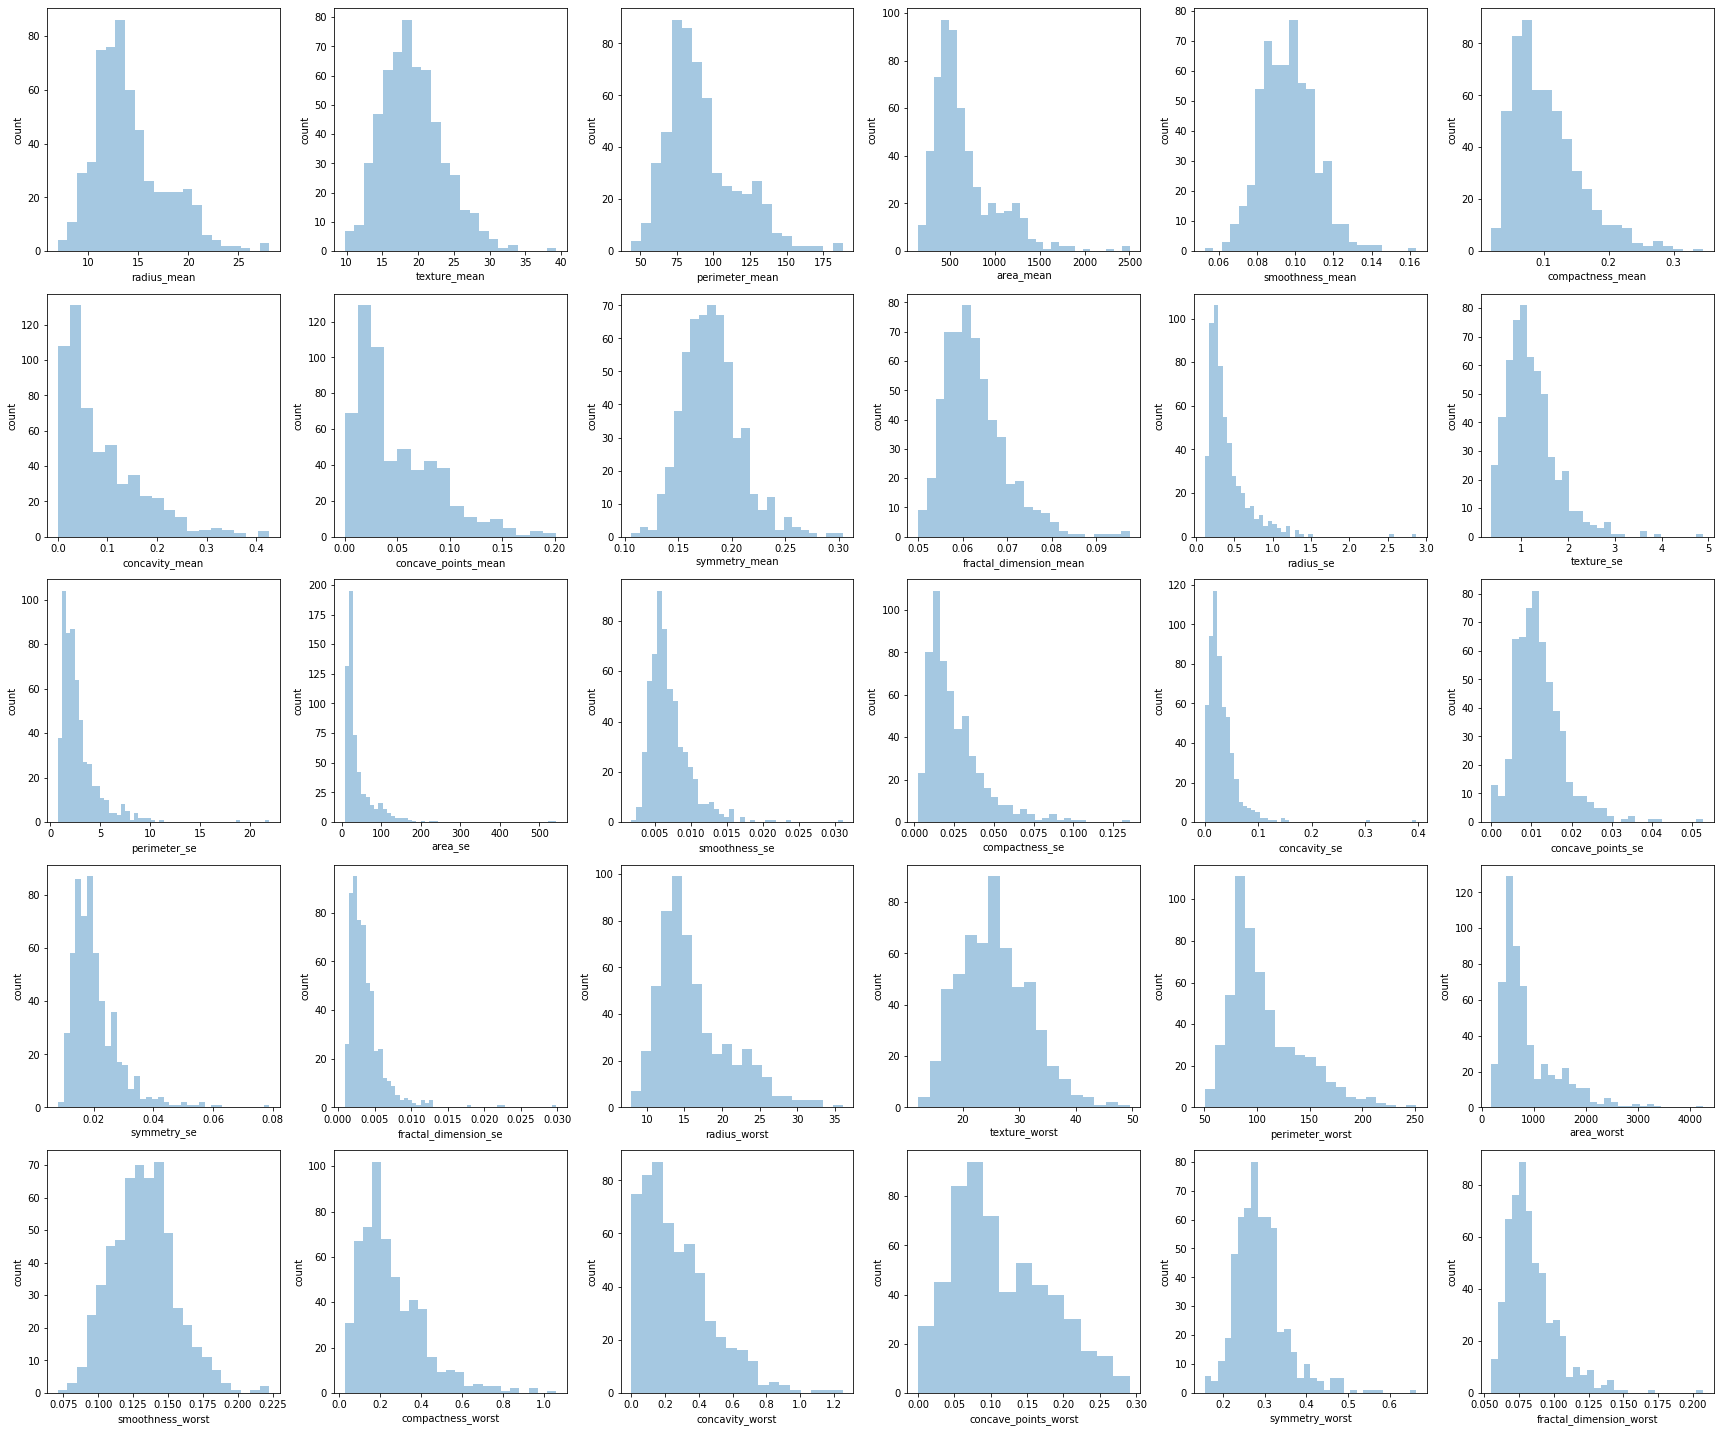

In [9]:
plt.figure(figsize=(24, 20))

print('P-values:')

for n, col in enumerate(bc_df.drop(['id', 'diagnosis'], axis=1)):
    plt.subplot(5, 6, n + 1)
    sns.distplot(bc_df[col], kde=False)
    jb_stats = jarque_bera(bc_df[col])
    norm_stats = normaltest(bc_df[col])
    print(
        'Jarque-Bera: {}; Normality: {}'.format(round(jb_stats[1], 4), round(norm_stats[1], 4)))
    plt.ylabel('count')

plt.tight_layout()
plt.show()

None of the distributions are normal (p-values less than 0.05 for both normality tests).

### Evaluate distribution of each variable following box-cox transformation

P-values:
Jarque-Bera: 0.7959; Normality: 0.8414
Jarque-Bera: 0.9259; Normality: 0.9652
Jarque-Bera: 0.8259; Normality: 0.8729
Jarque-Bera: 0.8783; Normality: 0.9242
Jarque-Bera: 0.5136; Normality: 0.483
Jarque-Bera: 0.0014; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.2869; Normality: 0.3022
Jarque-Bera: 0.5209; Normality: 0.5174
Jarque-Bera: 0.0002; Normality: 0.0
Jarque-Bera: 0.5608; Normality: 0.5608
Jarque-Bera: 0.014; Normality: 0.0004
Jarque-Bera: 0.0677; Normality: 0.0167
Jarque-Bera: 0.3571; Normality: 0.3407
Jarque-Bera: 0.0001; Normality: 0.0
Jarque-Bera: 0.0234; Normality: 0.004
Jarque-Bera: 0.0841; Normality: 0.1274
Jarque-Bera: 0.0289; Normality: 0.0055
Jarque-Bera: 0.0007; Normality: 0.0
Jarque-Bera: 0.15; Normality: 0.0702
Jarque-Bera: 0.3052; Normality: 0.2326
Jarque-Bera: 0.1278; Normality: 0.0513
Jarque-Bera: 0.2189; Normality: 0.1369
Jarque-Bera: 0.9988; Normality: 0.9808
Jarque-Bera: 0.0044; Normality: 0.0
Jarque-B

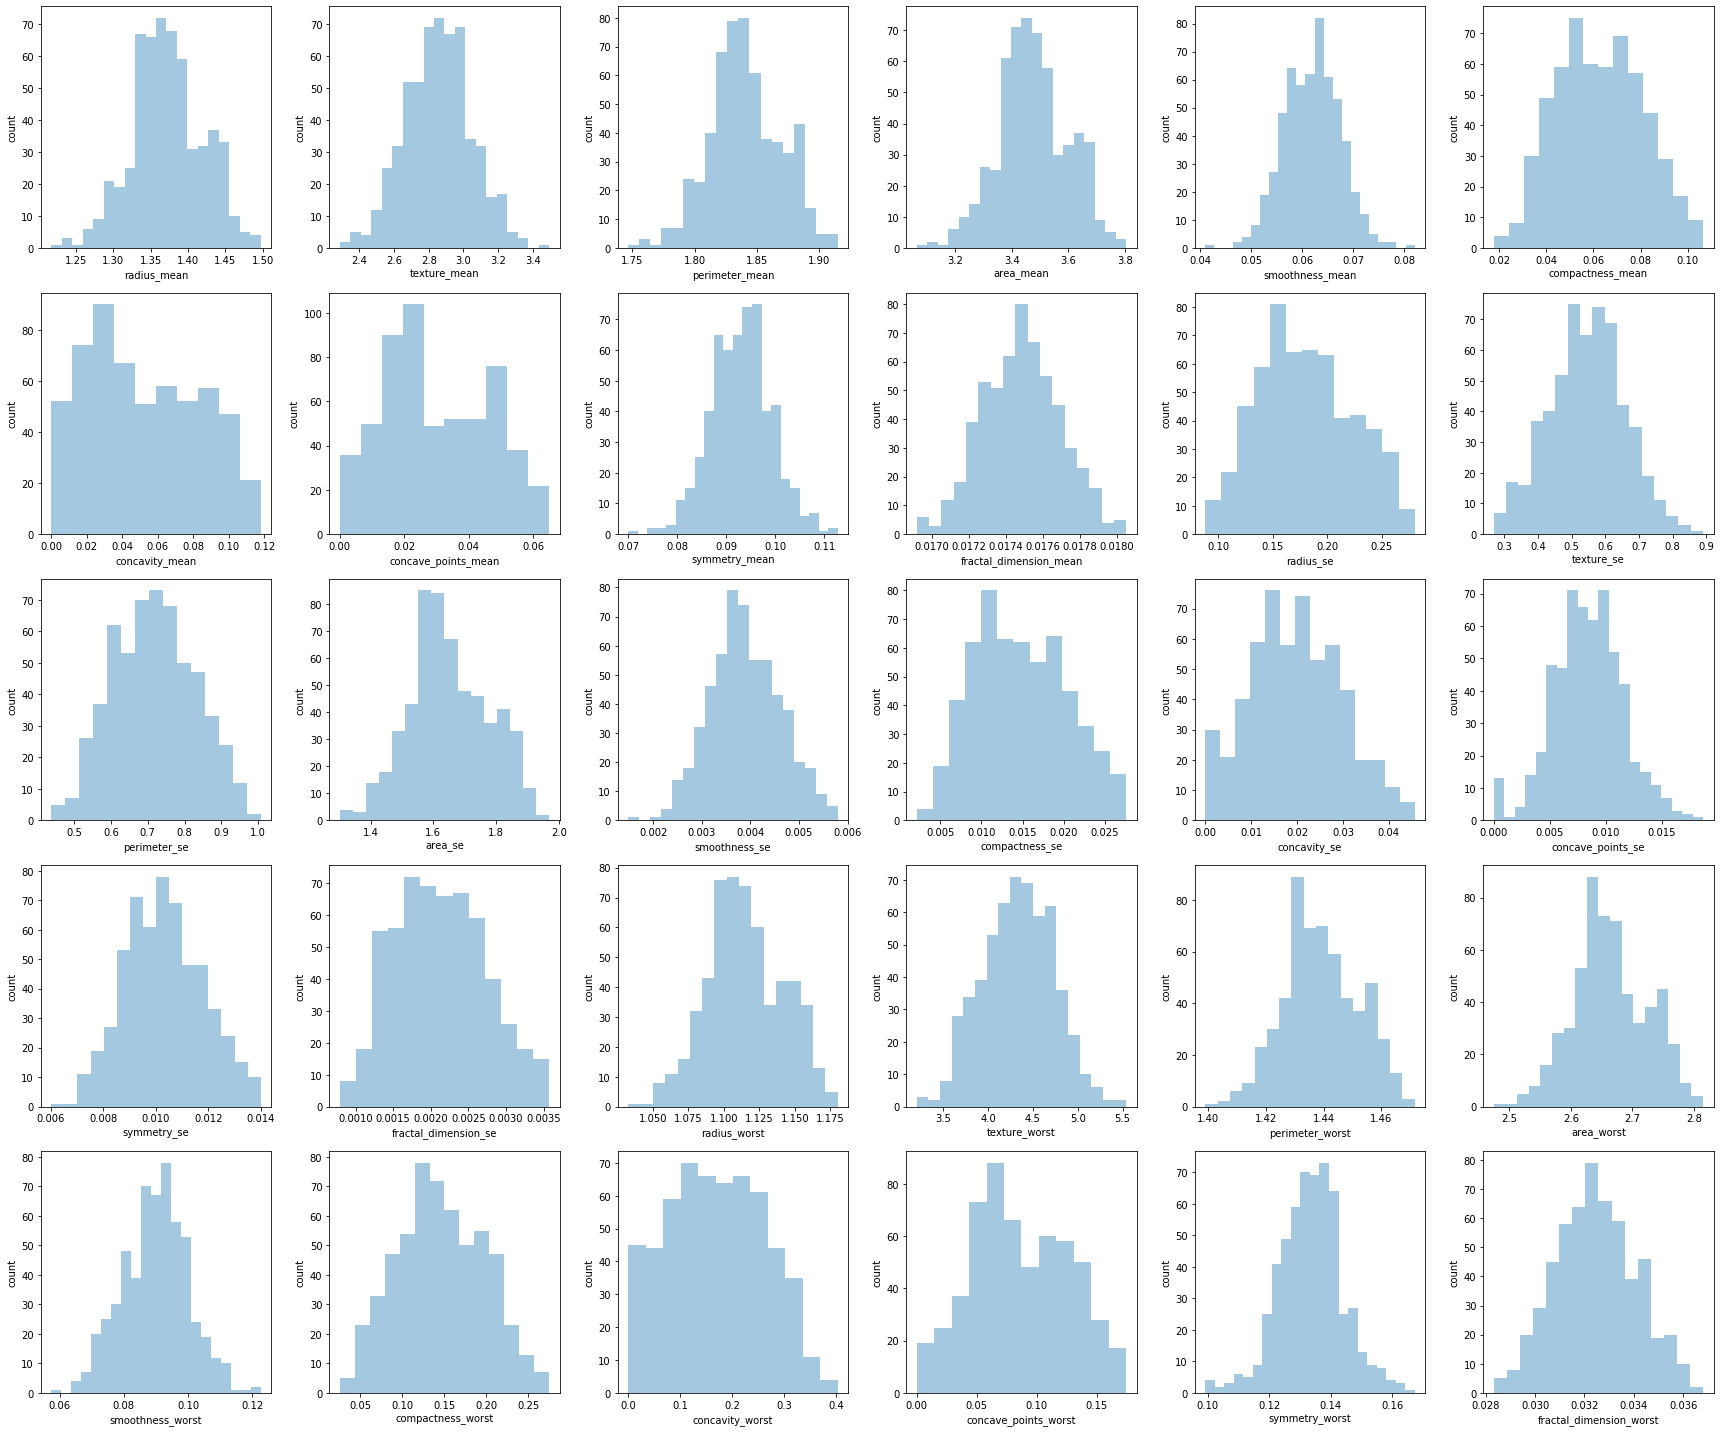

In [10]:
plt.figure(figsize=(24, 20))

print('P-values:')

for n, col in enumerate(bc_df.drop(['id', 'diagnosis'], axis=1)):
    plt.subplot(5, 6, n + 1)
    name = '{}_boxcox'.format(col)
    name, _ = boxcox(bc_df[col] + 1)
    sns.distplot(name, kde=False)
    jb_stats = jarque_bera(name)
    norm_stats = normaltest(name)
    print(
        'Jarque-Bera: {}; Normality: {}'.format(round(jb_stats[1], 4), round(norm_stats[1], 4)))
    plt.ylabel('count')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

The histograms above resemble normal distributions quite well, even though they are not all perfectly normally distributed, as confirmed by the Jarque-Bera and Normality tests.

### Evaluate class imbalance

In [11]:
# Determine class distribution for diagnosis
benign = bc_df['diagnosis'][bc_df['diagnosis'] == 0].count()
malignant = bc_df['diagnosis'][bc_df['diagnosis'] == 1].count()
benign_percent = int(round(benign / (benign + malignant), 2) * 100)
malignant_percent = int(100 - benign_percent)
print('Class distribution: {} benign and {} malignant ({}/{})'.format(
    benign, malignant, benign_percent, malignant_percent))

Class distribution: 357 benign and 212 malignant (63/37)


To deal with this slight imbalance, I am going to oversample the minority class (malignant) to get to 50/50.

## Select Features Based on Predictive Power and Correlation

### Evaluate relationship between diagnosis and box-cox transformed variables

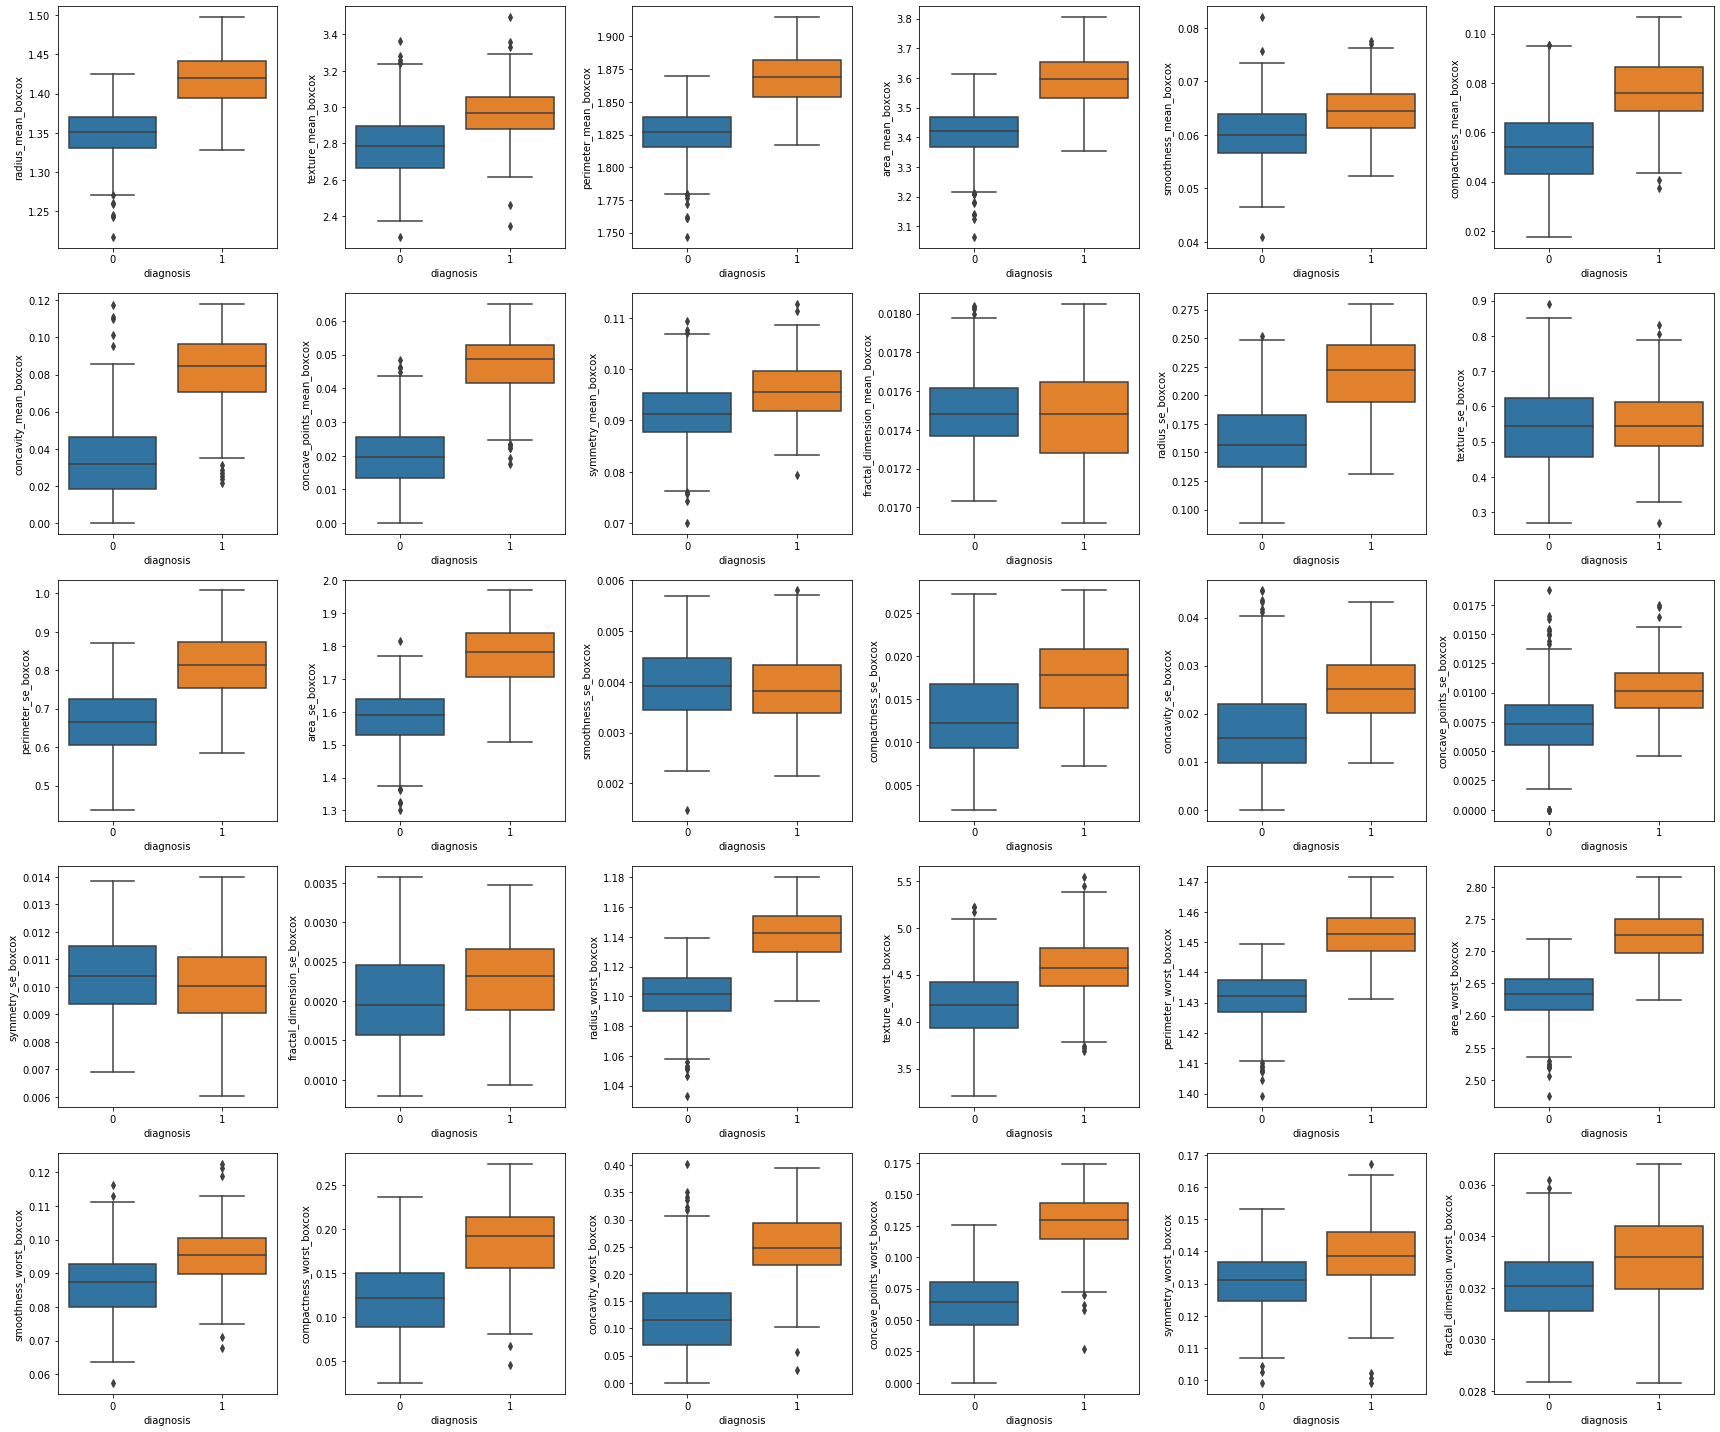

In [12]:
# Box-cox transform the variables
var = bc_df.drop(['id', 'diagnosis'], axis=1)
var_boxcox = pd.DataFrame()

for col in var:
    temp_var, _ = boxcox(var[col] + 1)
    name = '{}_boxcox'.format(col)
    var_boxcox[name] = temp_var

# Plot the newly transformed variables based on diagnosis
plt.figure(figsize=(24, 20))

for n, col in enumerate(var_boxcox):
    plt.subplot(5, 6, n + 1)
    sns.boxplot(x=bc_df['diagnosis'], y=var_boxcox[col])

plt.tight_layout()
plt.show()

In [13]:
# Perform t-test to identify variables that do not predict
# diagnosis (p-value greater than 0.05)
not_pred_var = []

for n, col in enumerate(var_boxcox):
    if ttest_ind(var_boxcox[bc_df['diagnosis'] == 1][col],
                 var_boxcox[bc_df['diagnosis'] == 0][col]
                 )[1] > 0.05:
        not_pred_var.append(var_boxcox[col].name)

not_pred_var

['fractal_dimension_mean_boxcox',
 'texture_se_boxcox',
 'smoothness_se_boxcox',
 'symmetry_se_boxcox']

The difference between malignant and benign is signficant for all of the variables except fractal_dimension_mean_boxcox, texture_se_boxcox, smoothness_se_boxcox, and symmetry_se_boxcox.

In [14]:
# Drop non-predictive features
var_boxcox_pred = var_boxcox.drop(not_pred_var, axis=1)

### Evaluate correlation between box-cox transformed variables

In [15]:
# Correlation matrix for box-cox transformed variables
var_boxcox_pred.corr()

,radius_mean_boxcox,texture_mean_boxcox,perimeter_mean_boxcox,area_mean_boxcox,smoothness_mean_boxcox,compactness_mean_boxcox,concavity_mean_boxcox,concave_points_mean_boxcox,symmetry_mean_boxcox,radius_se_boxcox,...,radius_worst_boxcox,texture_worst_boxcox,perimeter_worst_boxcox,area_worst_boxcox,smoothness_worst_boxcox,compactness_worst_boxcox,concavity_worst_boxcox,concave_points_worst_boxcox,symmetry_worst_boxcox,fractal_dimension_worst_boxcox
radius_mean_boxcox,1.000000,0.317611,0.998025,0.999606,0.151582,0.485146,0.650142,0.773487,0.119046,0.581908,...,0.979187,0.301237,0.973967,0.979035,0.105457,0.465807,0.573529,0.733279,0.158683,-0.001863
texture_mean_boxcox,0.317611,1.000000,0.322128,0.319977,-0.014937,0.241303,0.320807,0.287649,0.084592,0.345734,...,0.345020,0.916720,0.349997,0.345383,0.073318,0.269672,0.306647,0.291645,0.106236,0.101273
perimeter_mean_boxcox,0.998025,0.322128,1.000000,0.997360,0.188292,0.534065,0.688435,0.802783,0.150307,0.592188,...,0.979980,0.307056,0.979377,0.979316,0.137218,0.510169,0.611318,0.763230,0.182009,0.043757
area_mean_boxcox,0.999606,0.319977,0.997360,1.000000,0.142585,0.476716,0.647427,0.769677,0.112558,0.586677,...,0.980424,0.303975,0.974836,0.981044,0.099569,0.459689,0.571031,0.729615,0.153179,-0.007827
smoothness_mean_boxcox,0.151582,-0.014937,0.188292,0.142585,1.000000,0.683716,0.521577,0.570830,0.547533,0.341857,...,0.197512,0.038171,0.222311,0.185191,0.816006,0.493228,0.434956,0.507910,0.382211,0.508557
compactness_mean_boxcox,0.485146,0.241303,0.534065,0.476716,0.683716,1.000000,0.895775,0.849186,0.557739,0.516183,...,0.524991,0.252280,0.576848,0.512849,0.597572,0.903228,0.839807,0.830873,0.466499,0.695663
concavity_mean_boxcox,0.650142,0.320807,0.688435,0.647427,0.521577,0.895775,1.000000,0.934290,0.451521,0.600540,...,0.680330,0.331714,0.720715,0.674251,0.487152,0.839569,0.932507,0.905697,0.391495,0.539904
concave_points_mean_boxcox,0.773487,0.287649,0.802783,0.769677,0.570830,0.849186,0.934290,1.000000,0.438255,0.663134,...,0.797456,0.299849,0.822997,0.790294,0.495203,0.752186,0.824087,0.939675,0.367578,0.410788
symmetry_mean_boxcox,0.119046,0.084592,0.150307,0.112558,0.547533,0.557739,0.451521,0.438255,1.000000,0.347512,...,0.160589,0.101496,0.187449,0.150352,0.434646,0.449939,0.398047,0.407927,0.723364,0.423081
radius_se_boxcox,0.581908,0.345734,0.592188,0.586677,0.341857,0.516183,0.600540,0.663134,0.347512,1.000000,...,0.634400,0.275215,0.628397,0.632121,0.196573,0.340182,0.406269,0.525384,0.129283,0.090819


In [16]:
# Create list of highly correlated variables
high_corr = []

for col in var_boxcox_pred:
    temp_list = var_boxcox_pred.corr()[col].where(
        var_boxcox_pred.corr()[col] >= 0.7).dropna().index[1:].to_list()
    high_corr += temp_list

# Remove duplicates from list
var_to_drop = list(dict.fromkeys(high_corr))

# Drop highly correlated variables from variable dataframe
final_var = var_boxcox_pred.drop(var_to_drop, axis=1)
final_var

,radius_mean_boxcox,texture_mean_boxcox,smoothness_mean_boxcox,symmetry_mean_boxcox
0,1.426550,2.343281,0.070083,0.105084
1,1.449486,2.804129,0.057400,0.093627
2,1.442169,2.959161,0.067136,0.099096
3,1.336875,2.922877,0.077054,0.107606
4,1.447209,2.619135,0.063752,0.093557
...,...,...,...,...
564,1.457177,3.004553,0.067621,0.091554
565,1.445887,3.206803,0.062792,0.092195
566,1.412049,3.201547,0.057316,0.087991
567,1.449727,3.239472,0.069890,0.104750


In [17]:
# Check correlation matrix for remaining variables
final_var.corr()

,radius_mean_boxcox,texture_mean_boxcox,smoothness_mean_boxcox,symmetry_mean_boxcox
radius_mean_boxcox,1.000000,0.317611,0.151582,0.119046
texture_mean_boxcox,0.317611,1.000000,-0.014937,0.084592
smoothness_mean_boxcox,0.151582,-0.014937,1.000000,0.547533
symmetry_mean_boxcox,0.119046,0.084592,0.547533,1.000000


I will use the following four variables as my initial features (refer to below as select):
* radius_mean_boxcox
* texture_mean_boxcox
* smoothness_mean_boxcox
* symmetry_mean_boxcox

## Select Features Based on PCA

In [18]:
# Set feature and target variables
X = var_boxcox
Y = bc_df['diagnosis']

# Standardize the features
X = StandardScaler().fit_transform(X)

# Perform PCA
# Set to 4 after determining optimal number based on scree plot
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_,
    '\n\nThe cumulative percentage of total variance in the dataset explained by',
    'the components from Sklearn PCA.\n',
    pca.explained_variance_ratio_.cumsum()
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.46233065 0.19312412 0.09464774 0.06247048] 

The cumulative percentage of total variance in the dataset explained by the components from Sklearn PCA.
 [0.46233065 0.65545477 0.75010251 0.81257299]


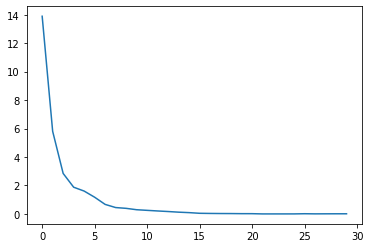

[1.38943383e+01 5.80392386e+00 2.84443117e+00 1.87741391e+00
 1.60552724e+00 1.17339288e+00 6.69078568e-01 4.47247028e-01
 3.91755604e-01 2.94574665e-01 2.50847030e-01 2.07723709e-01
 1.68208259e-01 1.22843294e-01 9.06597970e-02 4.38075146e-02
 3.36043600e-02 2.74886108e-02 2.46154844e-02 1.78254325e-02
 1.70366808e-02 7.77768079e-05 2.15018416e-04 6.08883490e-04
 1.34573915e-03 1.35151305e-02 4.38618478e-03 7.39837584e-03
 9.61950925e-03 9.30689197e-03]


In [19]:
# Print scree plot
Xt = X.T
Cx = np.cov(Xt)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [20]:
# Use first four components as features in model
top_four_pca = pd.DataFrame(data=principal_components)
top_four_pca

,0,1,2,3
0,7.411487,1.982815,-1.653208,-3.349256
1,2.688948,-3.548290,-0.486245,-1.059247
2,5.979160,-0.622361,-0.216933,-0.892575
3,5.531179,6.851685,-1.436813,0.432396
4,4.303638,-1.341186,0.666616,-3.631542
...,...,...,...,...
564,5.600189,-2.572129,1.940437,-1.374547
565,4.064104,-3.241672,2.997521,1.136442
566,2.490725,-2.107182,1.268661,1.198373
567,8.610182,1.307763,0.090168,1.914153


I will also run my models using these four principal components as features (refer to below as pca).

## Build and Evaluate Models

In [21]:
# Create dataframe with diagnosis (target variable)
Y = bc_df['diagnosis']

In [22]:
# Normalize four select features using StandardScaler
# and create dataframe
scaled_features = StandardScaler().fit_transform(final_var)
select_df = pd.DataFrame(
    scaled_features, index=final_var.index, columns=final_var.columns)
select_df

,radius_mean_boxcox,texture_mean_boxcox,smoothness_mean_boxcox,symmetry_mean_boxcox
0,1.134881,-2.678666,1.504114,1.953067
1,1.619346,-0.264377,-0.820227,0.102291
2,1.464796,0.547806,0.963977,0.985668
3,-0.759262,0.357721,2.781494,2.360528
4,1.571260,-1.233520,0.343932,0.090964
...,...,...,...,...
564,1.781795,0.785604,1.052829,-0.232645
565,1.543335,1.845150,0.168014,-0.129120
566,0.828589,1.817618,-0.835509,-0.808189
567,1.624440,2.016299,1.468642,1.899087


In [23]:
# Create dataframe with four PCA components
pca_df = top_four_pca
pca_df

,0,1,2,3
0,7.411487,1.982815,-1.653208,-3.349256
1,2.688948,-3.548290,-0.486245,-1.059247
2,5.979160,-0.622361,-0.216933,-0.892575
3,5.531179,6.851685,-1.436813,0.432396
4,4.303638,-1.341186,0.666616,-3.631542
...,...,...,...,...
564,5.600189,-2.572129,1.940437,-1.374547
565,4.064104,-3.241672,2.997521,1.136442
566,2.490725,-2.107182,1.268661,1.198373
567,8.610182,1.307763,0.090168,1.914153


### Bernoulli Naive Bayes Classifier

* Data is binary
* Variables are more or less independent
* Select data is standardized (z-scores)

#### Select Features

In [24]:
# Create training and testing sets from select_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [25]:
# Optimize model
parameters = [{'alpha': np.linspace(0.1, 1, 10)}]

# Run grid search
clf = GridSearchCV(BernoulliNB(), parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'alpha': 0.6}


In [26]:
# Instantiate model and store it in a new variable
bnb = BernoulliNB(**clf.best_params_)

# Fit model to the data
model = bnb.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'alpha': 0.6, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


In [27]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, bnb.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, bnb.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       0.86      0.88      0.87       288
   Malignant       0.88      0.86      0.87       288

    accuracy                           0.87       576
   macro avg       0.87      0.87      0.87       576
weighted avg       0.87      0.87      0.87       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.91      0.88      0.90        69
   Malignant       0.83      0.87      0.85        45

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



##### Note:
* Precision of the negative class (benign) -- for all instances classified as benign, what percent was correct
* Precision of the positive class (malignant) -- for all instances classified as malignant, what percent was correct
* Recall of the negative class (benign) is “specificity” or the true negative rate (ability to correctly identify benign tumors) -- for all instances that were actually benign, what percent was classified correctly.
* Recall of the positive class (malignant) is “sensitivity” or the true positive rate (ability to correctly identify malignant tumors) -- for all instances that were actually malignant, what percent was classified correctly.

##### Conclusion
Naives bayes model using select features:
* Not overfit -- explanatory accuracy (87%) similar to predictive accuracy (88%)
* Medium recall -- specificity (88%) similar to sensitivity (87%)
* Medium to high precision -- precision for benign (91%) significantly higher than for malignant (83%)

#### PCA Features

In [28]:
# Create training and testing sets from pca_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [29]:
# Optimize model
parameters = [{'alpha': np.linspace(0.1, 1, 10)}]

# Run grid search
clf = GridSearchCV(BernoulliNB(), parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'alpha': 0.1}


In [30]:
# Instantiate model and store it in a new variable
bnb = BernoulliNB(**clf.best_params_)

# Fit model to the data
model = bnb.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'alpha': 0.1, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


In [31]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, bnb.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, bnb.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       0.96      0.85      0.90       288
   Malignant       0.86      0.96      0.91       288

    accuracy                           0.90       576
   macro avg       0.91      0.90      0.90       576
weighted avg       0.91      0.90      0.90       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.91      0.87      0.89        69
   Malignant       0.81      0.87      0.84        45

    accuracy                           0.87       114
   macro avg       0.86      0.87      0.86       114
weighted avg       0.87      0.87      0.87       114



##### Conclusion
Naives bayes model using PCA features:
* Slightly overfit -- explanatory accuracy (90%) higher than predictive accuracy (87%)
* Medium recall -- specificity (87%) same as sensitivity (87%)
* Medium to high precision -- precision for benign (91%) significantly higher than for malignant (81%)

### K-Nearest Neighbors Classifier

* Units are equal (no categorical variables)
* Select data is standardized (z-scores)

#### Select Features

In [32]:
# Create training and testing sets from select_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [33]:
# Optimize model
parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Run grid search
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [34]:
# Instantiate model and store it in a new variable
knn = KNeighborsClassifier(**clf.best_params_)

# Fit model to the data
model = knn.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [35]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, knn.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, knn.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       288
   Malignant       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.88      0.88      0.88        69
   Malignant       0.82      0.82      0.82        45

    accuracy                           0.86       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.86      0.86      0.86       114



##### Conclusion
K-nearest neighbors model using select features:
* Overfit -- explanatory accuracy (100%) much higher than predictive accuracy (86%)
* Medium recall -- specificity (88%) slighlty higher than sensitivity (82%)
* Medium precision -- precision for benign (88%) higher than for malignant (82%)

#### PCA Features

In [36]:
# Create training and testing sets from pca_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [37]:
# Optimize model
parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Run grid search
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [38]:
# Instantiate model and store it in a new variable
knn = KNeighborsClassifier(**clf.best_params_)

# Fit model to the data
model = knn.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [39]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, knn.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, knn.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       288
   Malignant       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.92      0.97      0.94        69
   Malignant       0.95      0.87      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



##### Conclusion
K-nearest neighbors model using PCA features:
* Overfit -- explanatory accuracy (100%) higher than predictive accuracy (93%)
* Medium to high recall -- specificity (97%) higher than sensitivity (87%)
* High precision -- precision for benign (92%) lower than for malignant (95%)

### Decision Tree Classifier

* Feature selection part of model
* Easy to use with little data preparation
* Can handle feature interactions
* Prone to overfitting

#### Select Features

In [40]:
# Create training and testing sets from select_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [41]:
# Optimize model
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 1, 3, 5, 7, 9],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(DecisionTreeClassifier(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'splitter': 'best'}


In [42]:
# Instantiate model and store it in a new variable
dtc = DecisionTreeClassifier(**clf.best_params_)

# Fit model to the data
model = dtc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [43]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, dtc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, dtc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       288
   Malignant       0.98      0.98      0.98       288

    accuracy                           0.98       576
   macro avg       0.98      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.91      0.90      0.91        69
   Malignant       0.85      0.87      0.86        45

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



##### Conclusion
Decision tree model using select features:
* Overfit -- explanatory accuracy (98%) higher than predictive accuracy (89%)
* Medium to high recall -- specificity (90%) slighlty higher than sensitivity (87%)
* Medium to high precision -- precision for benign (91%) higher than for malignant (85%)

#### PCA Features

In [44]:
# Create training and testing sets from pca_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [45]:
# Optimize model
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(DecisionTreeClassifier(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'splitter': 'best'}


In [46]:
# Instantiate model and store it in a new variable
dtc = DecisionTreeClassifier(**clf.best_params_)

# Fit model to the data
model = dtc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [47]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, dtc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, dtc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       288
   Malignant       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.88      0.97      0.92        69
   Malignant       0.95      0.80      0.87        45

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



##### Conclusion
Decision tree model using PCA features:
* Overfit -- explanatory accuracy (100%) higher than predictive accuracy (90%)
* Medium to high recall -- specificity (97%) significantly higher than sensitivity (80%)
* Medium to high precision -- precision for benign (88%) lower than for malignant (95%)

#### All Features

In [48]:
# Normalize all features using StandardScaler
# and create dataframe
scaled_features_all = StandardScaler().fit_transform(var_boxcox)
all_df = pd.DataFrame(
    scaled_features_all, index=var_boxcox.index, columns=var_boxcox.columns)
all_df

,radius_mean_boxcox,texture_mean_boxcox,perimeter_mean_boxcox,area_mean_boxcox,smoothness_mean_boxcox,compactness_mean_boxcox,concavity_mean_boxcox,concave_points_mean_boxcox,symmetry_mean_boxcox,fractal_dimension_mean_boxcox,...,radius_worst_boxcox,texture_worst_boxcox,perimeter_worst_boxcox,area_worst_boxcox,smoothness_worst_boxcox,compactness_worst_boxcox,concavity_worst_boxcox,concave_points_worst_boxcox,symmetry_worst_boxcox,fractal_dimension_worst_boxcox
0,1.134881,-2.678666,1.259822,1.126421,1.504114,2.165938,1.862988,1.848558,1.953067,1.886398,...,1.619635,-1.488367,1.810506,1.652210,1.282792,1.942737,1.730182,1.935654,2.197206,1.723624
1,1.619346,-0.264377,1.528723,1.633946,-0.820227,-0.384102,0.291976,0.820609,0.102291,-0.956577,...,1.578689,-0.288382,1.430616,1.610022,-0.325080,-0.296580,0.070746,1.101594,-0.121997,0.537179
2,1.464796,0.547806,1.454664,1.461645,0.963977,1.163977,1.403673,1.683104,0.985668,-0.292433,...,1.419757,0.071406,1.321941,1.425307,0.580301,1.209701,1.005512,1.722744,1.218181,0.453955
3,-0.759262,0.357721,-0.514886,-0.836238,2.781494,2.197843,1.642391,1.423004,2.360528,2.708924,...,-0.083692,0.228089,-0.039480,-0.436860,2.857821,2.282276,1.675087,1.862378,3.250202,2.517606
4,1.571260,-1.233520,1.583340,1.595120,0.343932,0.762392,1.407479,1.410929,0.090964,-0.511332,...,1.293727,-1.637882,1.316582,1.309486,0.284367,-0.131829,0.817474,0.807077,-0.943554,-0.279402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.781795,0.785604,1.746492,1.823030,1.052829,0.460810,1.653784,1.783067,-0.232645,-1.053698,...,1.626869,0.212151,1.547961,1.657442,0.438013,-0.077871,0.859079,1.503734,-1.721528,-0.751459
565,1.543335,1.845150,1.485601,1.545430,0.168014,0.207602,0.984746,1.320730,-0.129120,-1.259564,...,1.433823,1.832201,1.365939,1.443167,-0.667317,-0.245277,0.480804,0.810995,-0.480093,-1.210527
566,0.828589,1.817618,0.811329,0.835270,-0.835509,0.183969,0.375105,0.396882,-0.808189,-0.998237,...,0.769202,1.320625,0.786129,0.796192,-0.799337,0.626487,0.566826,0.526136,-1.301164,-0.170872
567,1.624440,2.016299,1.702747,1.551036,1.468642,2.162820,1.994466,1.884414,1.899087,1.147810,...,1.656477,1.968949,1.810506,1.513198,1.387135,2.284642,2.136932,1.931990,1.744693,1.850944


In [49]:
# Create training and testing sets from all_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    all_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [50]:
# Optimize model
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 5, 10, 15, 20, 25, 30]}

# Run grid search
clf = GridSearchCV(DecisionTreeClassifier(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 30, 'splitter': 'best'}


In [51]:
# Instantiate model and store it in a new variable
dtc = DecisionTreeClassifier(**clf.best_params_)

# Fit model to the data
model = dtc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 30, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [52]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, dtc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, dtc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       288
   Malignant       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.89      0.96      0.92        69
   Malignant       0.93      0.82      0.87        45

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



##### Conclusion
Decision tree model using all features:
* Overfit -- explanatory accuracy (100%) higher than predictive accuracy (90%)
* Medium to high recall -- specificity (96%) significantly higher than sensitivity (82%)
* Medium to high precision -- precision for benign (89%) lower than for malignant (93%)

### Random Forest Classifier

* Known for low variance and high accuracy
* Helps identify significant variables from many input variables
* Difficult to iterate or imrove generated model

#### Select Features

In [53]:
# Create training and testing sets from select_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [54]:
# Optimize model
parameters = {'n_estimators': [10],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(RandomForestClassifier(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'n_estimators': 10}


In [55]:
# Instantiate model and store it in a new variable
rfc = RandomForestClassifier(**clf.best_params_)

# Fit model to the data
model = rfc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [56]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, rfc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, rfc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       288
   Malignant       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.90      0.94      0.92        69
   Malignant       0.90      0.84      0.87        45

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



##### Conclusion
Random forest model using select features:
* Overfit -- explanatory accuracy (100%) higher than predictive accuracy (90%)
* Medium to high recall -- specificity (94%) higher than sensitivity (84%)
* High precision -- precision for benign (90%) same as for malignant (90%)

#### PCA Features

In [57]:
# Create training and testing sets from pca_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [58]:
# Optimize model
parameters = {'n_estimators': [10],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(RandomForestClassifier(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'n_estimators': 10}


In [59]:
# Instantiate model and store it in a new variable
rfc = RandomForestClassifier(**clf.best_params_)

# Fit model to the data
model = rfc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [60]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, rfc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, rfc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       288
   Malignant       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.88      0.97      0.92        69
   Malignant       0.95      0.80      0.87        45

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



##### Conclusion
Random forest model using PCA features:
* Overfit -- explanatory accuracy (100%) higher than predictive accuracy (90%)
* Medium to high recall -- specificity (97%) significantly higher than sensitivity (80%)
* Medium to high precision -- precision for benign (88%) lower than for malignant (95%)

#### All Features

In [61]:
# Create training and testing sets from all_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    all_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [62]:
# Optimize model
parameters = {'n_estimators': [10],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 5, 10, 20, 30]}

# Run grid search
clf = GridSearchCV(RandomForestClassifier(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'n_estimators': 10}


In [63]:
# Instantiate model and store it in a new variable
rfc = RandomForestClassifier(**clf.best_params_)

# Fit model to the data
model = rfc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [64]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, rfc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, rfc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       288
   Malignant       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.92      0.96      0.94        69
   Malignant       0.93      0.87      0.90        45

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



##### Conclusion
Random forest model using all features:
* Overfit -- explanatory accuracy (100%) higher than predictive accuracy (92%)
* Medium to high recall -- specificity (96%) higher than sensitivity (87%)
* High precision -- precision for benign (92%) similar to that for malignant (93%)

### Support Vector Binary Classifier

* Tremendous accuracy
* Widely used for classification problems with exactly two classes
* Tend to perform better than random forest on sparse datasets
* Difficult to tune

#### Select Features

In [65]:
# Create training and testing sets from select_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [66]:
# Optimize model
parameters = {'C': [0.01, 0.1, 0.5, 1],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'degree': [1, 2, 3],
              'gamma': ['scale', 'auto']}

# Run grid search
clf = GridSearchCV(SVC(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'C': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [67]:
# Instantiate model and store it in a new variable
svc = SVC(**clf.best_params_)

# Fit model to the data
model = svc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [68]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, svc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, svc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       0.96      0.93      0.94       288
   Malignant       0.93      0.96      0.95       288

    accuracy                           0.94       576
   macro avg       0.94      0.94      0.94       576
weighted avg       0.94      0.94      0.94       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.90      0.94      0.92        69
   Malignant       0.90      0.84      0.87        45

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



##### Conclusion
Support vector model using select features:
* Overfit -- explanatory accuracy (94%) higher than predictive accuracy (90%)
* Medium to high recall -- specificity (94%) higher than sensitivity (84%)
* High precision -- precision for benign (90%) same as for malignant (90%)

#### PCA Features

In [69]:
# Create training and testing sets from pca_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [70]:
# Optimize model
parameters = {'C': [0.01, 0.1, 0.5, 1],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'degree': [1, 2, 3],
              'gamma': ['scale', 'auto']}

# Run grid search
clf = GridSearchCV(SVC(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}


In [71]:
# Instantiate model and store it in a new variable
svc = SVC(**clf.best_params_)

# Fit model to the data
model = svc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [72]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, svc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, svc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       288
   Malignant       0.96      0.98      0.97       288

    accuracy                           0.97       576
   macro avg       0.97      0.97      0.97       576
weighted avg       0.97      0.97      0.97       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        69
   Malignant       0.98      0.93      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



##### Conclusion
Support vector model using PCA features:
* Not overfit -- explanatory accuracy (97%) similar to predictive accuracy (96%)
* High recall -- specificity (99%) higher than sensitivity (93%)
* High precision -- precision for benign (96%) slightly lower than for malignant (98%)

### Linear Support Vector Binary Classifier

* See SVC text above

#### Select Features

In [73]:
# Create training and testing sets from select_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [74]:
# Optimize model
parameters = {'C': [0.001, 0.01, 0.1, 0.5, 1]}

# Run grid search
clf = GridSearchCV(LinearSVC(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'C': 0.01}


In [75]:
# Instantiate model and store it in a new variable
lsvc = LinearSVC(**clf.best_params_)

# Fit model to the data
model = lsvc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'C': 0.01, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [76]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, lsvc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, lsvc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       0.96      0.94      0.95       288
   Malignant       0.94      0.96      0.95       288

    accuracy                           0.95       576
   macro avg       0.95      0.95      0.95       576
weighted avg       0.95      0.95      0.95       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.92      0.94      0.93        69
   Malignant       0.91      0.87      0.89        45

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



##### Conclusion
Linear support vector model using select features:
* Overfit -- explanatory accuracy (95%) higher than predictive accuracy (91%)
* Medium to high recall -- specificity (94%) higher than sensitivity (87%)
* High precision -- precision for benign (92%) similar to that for malignant (91%)

#### PCA Features

In [77]:
# Create training and testing sets from pca_df and Y
X_train, X_test, y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Oversample from minority class (malignant)
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Confirm class rebalance
print(y_train_res.sum(), len(y_train_res))

288 576


In [78]:
# Optimize model
parameters = {'C': [0.001, 0.01, 0.1, 0.5, 1]}

# Run grid search
clf = GridSearchCV(LinearSVC(random_state=1234),
                   parameters, cv=10, scoring='f1')
clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

{'C': 0.1}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

In [79]:
# Instantiate model and store it in a new variable
lsvc = LinearSVC(**clf.best_params_)

# Fit model to the data
model = lsvc.fit(X_train_res, y_train_res)
print(model.get_params())  # Check parameters

{'C': 0.1, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [80]:
# Use classification report to evaluate model on resampled train set (explanatory)
target_names = ['Benign', 'Malignant']
print('Training Set (Explanatory):')
print(classification_report(y_train_res, lsvc.predict(
    X_train_res), target_names=target_names))

# Use classification report to evaluate model on test set (predictive)
target_names = ['Benign', 'Malignant']
print('Test Set (Predictive):')
print(classification_report(y_test, lsvc.predict(
    X_test), target_names=target_names))

Training Set (Explanatory):
              precision    recall  f1-score   support

      Benign       0.98      0.97      0.97       288
   Malignant       0.97      0.98      0.97       288

    accuracy                           0.97       576
   macro avg       0.97      0.97      0.97       576
weighted avg       0.97      0.97      0.97       576

Test Set (Predictive):
              precision    recall  f1-score   support

      Benign       0.94      0.99      0.96        69
   Malignant       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##### Conclusion
Linear support vector model using select features:
* Not overfit -- explanatory accuracy (97%) similar to predictive accuracy (96%)
* High recall -- specificity (99%) higher than sensitivity (91%)
* High precision -- precision for benign (94%) lower than that for malignant (98%)

### Final Evaluation

Of the models tested, the Support Vector Binary Classifier using the PCA features appears to be the best performer. It was not overfit and demonstrated both high recall (96%) and precision (97%), which is also evident in the high f1 score (96%). Moreover, in the context of cancer diagnoses, false negatives (incorrectly identify a malignant sample as benign) are much more detrimental than false positives (incorrectly identify a benign sample as malignant). Accordingly, the SVC model using the PCA features is superior to the other models because it demonstrates the highest recall (93%) for the malignant class.